In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

def get_data(file):
    return pd.read_csv( file + '.csv', index_col=0, parse_dates=True )

#calculate return correlations on a rolling window
def calc_corr( ser1, ser2, window ):
    ret1 = ser1.pct_change(1)
    ret2 = ser2.pct_change(1)

    return ret1.rolling(window).corr(ret2)


#define points to plot
points_to_plot = 300

data = get_data('indexes')

print(data.head())


             SP500      NDX
Date                       
1990-01-02  359.69  227.725
1990-01-03  358.76  226.100
1990-01-04  355.67  224.715
1990-01-05  352.20  223.140
1990-01-08  353.79  223.540


In [2]:
#normalize to the same point in time


for col in data:
    data[ col + '_norm'] = ( data[-points_to_plot:][col].pct_change(1) + 1 ).cumprod()
    
    
print(data.tail())

              SP500       NDX  SP500_norm  NDX_norm
Date                                               
2018-07-27  2818.82  7296.781    1.167179  1.262774
2018-07-30  2802.60  7193.103    1.160463  1.244832
2018-07-31  2816.29  7231.983    1.166132  1.251560
2018-08-01  2813.36  7272.887    1.164919  1.258639
2018-08-02  2827.22  7372.148    1.170658  1.275817


In [3]:
print(data['SP500'].head())

Date
1990-01-02    359.69
1990-01-03    358.76
1990-01-04    355.67
1990-01-05    352.20
1990-01-08    353.79
Name: SP500, dtype: float64


In [4]:
type(data['SP500'])

pandas.core.series.Series

In [5]:
data['corr'] = calc_corr( data['SP500_norm'], data['NDX_norm'], 100)

data.tail()

,SP500,NDX,SP500_norm,NDX_norm,corr
Date,,,,,
2018-07-27,2818.82,7296.781,1.167179,1.262774,0.939082
2018-07-30,2802.60,7193.103,1.160463,1.244832,0.938597
2018-07-31,2816.29,7231.983,1.166132,1.251560,0.938573
2018-08-01,2813.36,7272.887,1.164919,1.258639,0.935668
2018-08-02,2827.22,7372.148,1.170658,1.275817,0.935795


In [6]:
data['rel_str'] = data['NDX'] / data['SP500']

In [7]:
plot_data = data[-points_to_plot:]

plot_data.head()

,SP500,NDX,SP500_norm,NDX_norm,corr,rel_str
Date,,,,,,
2017-05-25,2415.07,5778.374,NaN,NaN,NaN,2.392632
2017-05-26,2415.82,5788.359,1.000311,1.001728,NaN,2.396022
2017-05-30,2412.91,5794.632,0.999106,1.002814,NaN,2.401512
2017-05-31,2411.80,5788.802,0.998646,1.001805,NaN,2.400200
2017-06-01,2430.06,5816.511,1.006207,1.006600,NaN,2.393567


In [8]:
plot_data = data[-points_to_plot:]

plot_data.head()

,SP500,NDX,SP500_norm,NDX_norm,corr,rel_str
Date,,,,,,
2017-05-25,2415.07,5778.374,NaN,NaN,NaN,2.392632
2017-05-26,2415.82,5788.359,1.000311,1.001728,NaN,2.396022
2017-05-30,2412.91,5794.632,0.999106,1.002814,NaN,2.401512
2017-05-31,2411.80,5788.802,0.998646,1.001805,NaN,2.400200
2017-06-01,2430.06,5816.511,1.006207,1.006600,NaN,2.393567


In [9]:
plot_data.tail()

,SP500,NDX,SP500_norm,NDX_norm,corr,rel_str
Date,,,,,,
2018-07-27,2818.82,7296.781,1.167179,1.262774,0.939082,2.588594
2018-07-30,2802.60,7193.103,1.160463,1.244832,0.938597,2.566582
2018-07-31,2816.29,7231.983,1.166132,1.251560,0.938573,2.567911
2018-08-01,2813.36,7272.887,1.164919,1.258639,0.935668,2.585125
2018-08-02,2827.22,7372.148,1.170658,1.275817,0.935795,2.607561


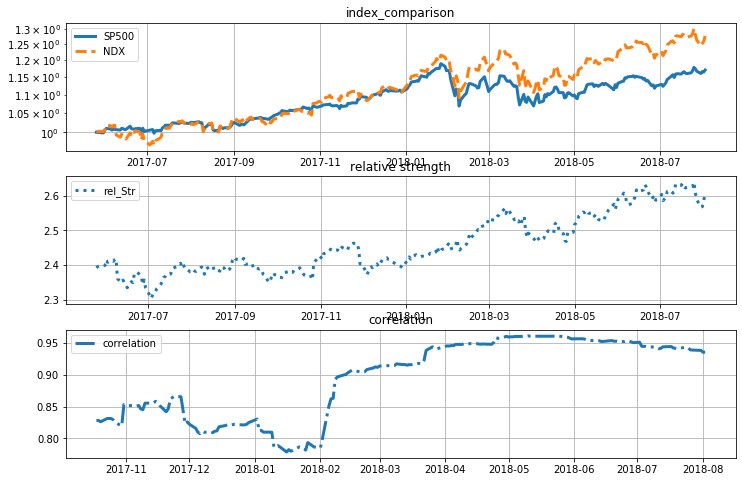

In [23]:
fig = plt.figure(figsize=(12,8))

#first subplot

ax1 = fig.add_subplot(311)
ax1.set_title('index_comparison')
ax1.semilogy(plot_data['SP500_norm'], linestyle = '-', label='SP500', linewidth=3.0)
ax1.semilogy(plot_data['NDX_norm'], linestyle='--', label='NDX', linewidth=3.0)
ax1.grid()
ax1.legend()

#second subplot

ax2 = fig.add_subplot(312)
ax2.set_title('relative strength')
ax2.plot( plot_data['rel_str'], linestyle=':', label='rel_Str', linewidth = 3.0 )
ax2.grid()
ax2.legend()

#third subplot

ax3 = fig.add_subplot(313)
ax3.set_title('correlation')
ax3.plot(plot_data['corr'], linestyle='-.', label='correlation', linewidth = 3.0)
ax3.grid()
ax3.legend()
